# Analyzing the Impact of Mouse Weight on Tumor Volume in Mice Treated with Capomulin

### Observations and Inferences
1. Capomulin and Ramicane Effectiveness:Capomulin and Ramicane show significantly lower mean tumor volumes, indicating their potential effectiveness in reducing tumor size.

2. Variability in Ketapril and Naftisol: High variances in tumor volumes for Ketapril and Naftisol suggest inconsistent treatment responses.

3. Weight and Tumor Volume Correlation: A strong positive correlation (0.84) exists between mouse weight and tumor volume for the Capomulin regimen, indicating that heavier mice tend to have larger tumors.


# Prepare the Data
## Import packages and load data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data
mouse_metadata = pd.read_csv('Mouse_metadata.csv')
study_results = pd.read_csv('Study_results.csv')

## Merge the DataFrames

In [57]:
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


## Number of unique mice IDs

In [58]:
unique_mice = merged_df["Mouse ID"].nunique()
print(f"Number of unique mice: {unique_mice}")


Number of unique mice: 249


## Duplicate time points

In [59]:
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]
print(duplicates)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


## Remove duplicate data and update unique mice count

In [60]:
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
updated_unique_mice = cleaned_df["Mouse ID"].nunique()
print(f"Updated number of unique mice: {updated_unique_mice}")


Updated number of unique mice: 249


# Generate Summary Statistics
## Summary statistics for each drug regimen:

In [61]:
summary_stats = cleaned_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


# Create Bar Charts and Pie Charts
## Bar chart of total number of timepoints for each drug regimen (Pandas)

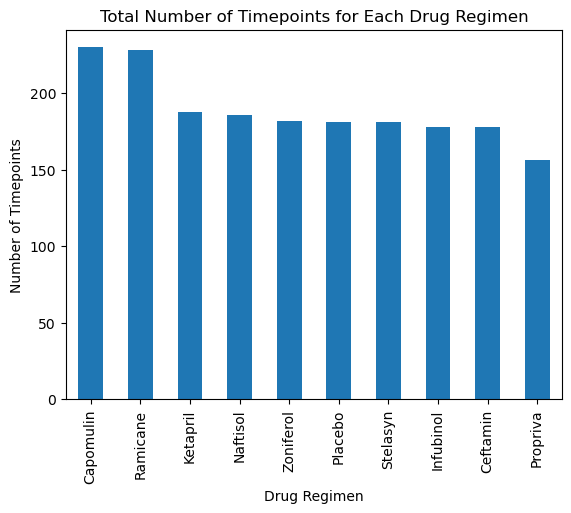

In [62]:
timepoint_counts = cleaned_df["Drug Regimen"].value_counts()
timepoint_counts.plot(kind='bar')
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()


## Bar chart of total number of timepoints for each drug regimen (Matplotlib)

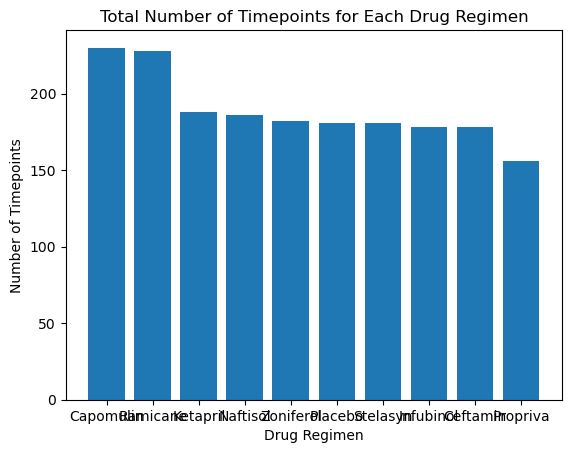

In [63]:
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()


## Pie chart of distribution of female vs male mice (Pandas)

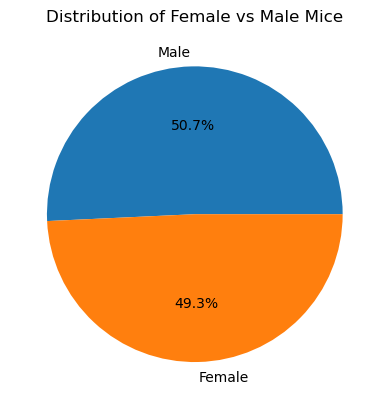

In [64]:
sex_counts = cleaned_df["Sex"].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('')
plt.show()


## Pie chart of distribution of female vs male mice (Matplotlib)

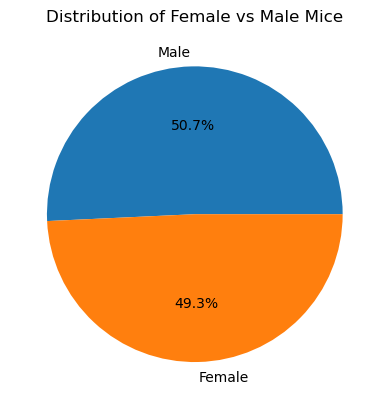

In [65]:
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.show()


# Calculate Quartiles, Find Outliers, and Create a Box Plot
## Calculate final tumor volume and identify outliers

In [66]:
last_timepoint_df = cleaned_df.groupby("Mouse ID").agg({"Timepoint": "max"}).reset_index()
merged_final_df = pd.merge(last_timepoint_df, cleaned_df, on=["Mouse ID", "Timepoint"])

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

for drug in treatment_list:
    volumes = merged_final_df[merged_final_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volumes.append(volumes)
    
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"{drug} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Box plot of final tumor volume

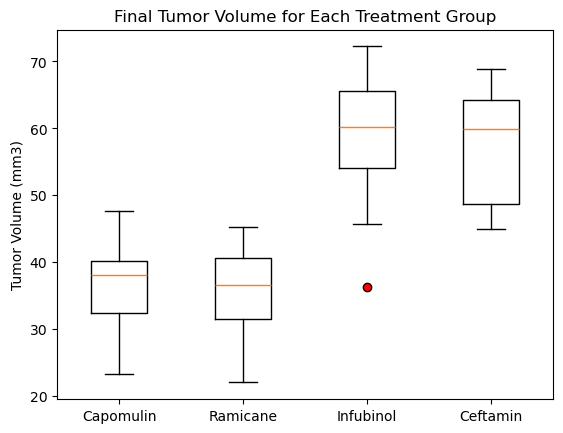

In [67]:
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='o'))
ax.set_title("Final Tumor Volume for Each Treatment Group")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()


# Create a Line Plot and a Scatter Plot
## Line plot of tumor volume vs. time point for one mouse treated with Capomulin

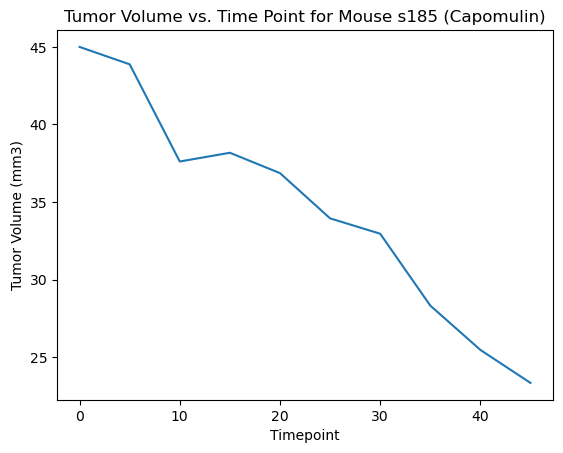

In [68]:
capomulin_mouse = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "s185")]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Time Point for Mouse s185 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Scatter plot of average tumor volume vs. mouse weight for Capomulin regimen

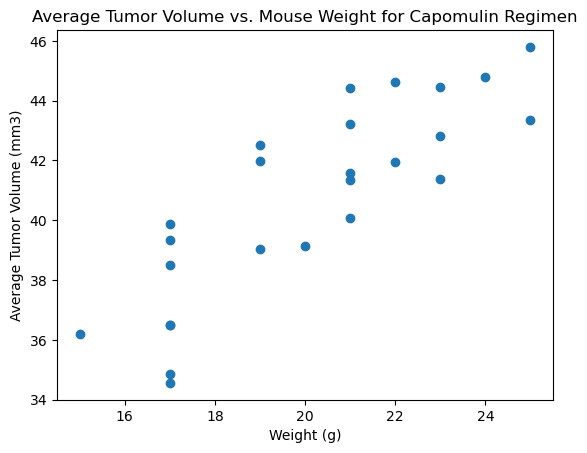

In [69]:


# Filtering the DataFrame for the Capomulin regimen
capomulin_group = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# Selecting only numeric columns for the mean calculation
numeric_columns = ["Tumor Volume (mm3)", "Weight (g)"]

# Calculating the mean for numeric columns grouped by Mouse ID
avg_values = capomulin_group.groupby("Mouse ID")[numeric_columns].mean()

# Extracting the average tumor volume and mouse weight
avg_tumor_volume = avg_values["Tumor Volume (mm3)"]
mouse_weight = avg_values["Weight (g)"]

# Creating a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


# Calculate Correlation and Regression
## Correlation coefficient and linear regression model

Correlation coefficient: 0.8419363424694722


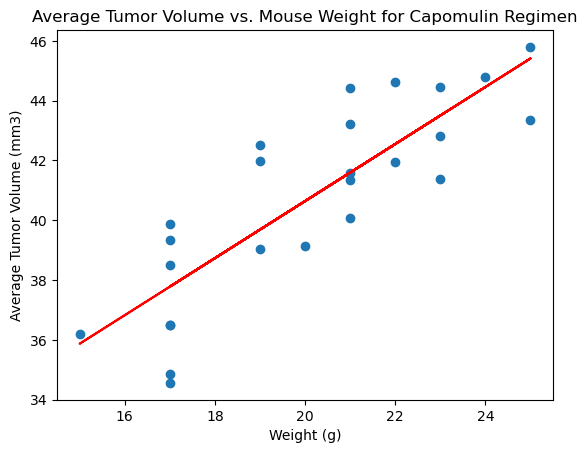

In [70]:
correlation = mouse_weight.corr(avg_tumor_volume)
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)
regression_values = slope * mouse_weight + intercept

plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regression_values, "r-")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
